# <strong>Import libraries</strong>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

# <strong>Read the data</strong>

In [2]:
covid_df = pd.read_csv('../data/final_data.csv')
covid_df.head()

,Country,Date,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",TotalTests,Population,Continent,1 Caseevery X ppl
0,Afghanistan,2023-03-02,209359,19,7896.0,0.0,191166.0,10,10297.0,45,1201475.0,40754388,Asia,195
1,Afghanistan,2023-03-03,209362,3,7896.0,0.0,191170.0,4,10296.0,45,1201744.0,40754388,Asia,195
2,Afghanistan,2023-03-04,209370,4,7896.0,0.0,191181.0,7,10293.0,45,1202018.0,40754388,Asia,195
3,Afghanistan,2023-03-05,209390,20,7896.0,0.0,191212.0,31,10282.0,45,1202290.0,40754388,Asia,195
4,Afghanistan,2023-03-06,209394,24,7896.0,0.0,191233.0,52,10265.0,45,1202290.0,40754388,Asia,195


# <strong> Analytics for data visualization</strong>
### &#9889; **Question 2 : Is there a big difference in the mortality rate of different countries? Which countries have mortality rates above 10%?**
<strong> There are following steps to solve this problem:</strong> 
- Calculate the mortality rate of each country by dividing the number of deaths by the number of total cases.
- Sort the countries by the mortality rate in descending order.
- Visualize top 10 countries with the highest mortality rate and give comments.

### **Step 1: Calculate the mortality rate of each country on "2023-03-10"**

In [3]:
# select all the countries that have date on 2023-03-10 and calculate the mortality rate
last_day_df = covid_df[covid_df['Date'] == '2023-03-10']
last_day_df.loc[:, 'mortality_rate'] = round(last_day_df['TotalDeaths'] / last_day_df['TotalCases'], 2) * 100

/home/phatpham/anaconda3/envs/min_ds-env/lib/python3.8/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/home/phatpham/anaconda3/envs/min_ds-env/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


### **Step 2: Sort the countries by the mortality rate in descending order.**

In [4]:
# sort by morality rate and get top 10
last_day_df = last_day_df.sort_values(by=['mortality_rate'], ascending=False)
top_10 = last_day_df.head(10)
top_10

,Country,Date,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",TotalTests,Population,Continent,1 Caseevery X ppl,mortality_rate
1403,Yemen,2023-03-10,11945,0,2159.0,0.0,9124.0,0,662.0,23,329592.0,31154867,Asia,"2,608",18.0
1205,Sudan,2023-03-10,63829,0,5017.0,0.0,58492.0,0,320.0,0,562941.0,45992020,Africa,721,8.0
1232,Syria,2023-03-10,57467,0,3164.0,0.0,54303.0,0,0.0,0,146269.0,19364809,Asia,337,6.0
1160,Somalia,2023-03-10,27324,0,1361.0,0.0,13182.0,0,12781.0,0,400466.0,16841795,Africa,616,5.0
1016,Peru,2023-03-10,4487770,217,219548.0,9.0,4265744.0,110,2478.0,34,38122323.0,33684208,South America,8,5.0
377,Egypt,2023-03-10,515759,0,24613.0,0.0,442182.0,0,48964.0,122,3693367.0,106156692,Africa,206,5.0
746,Liberia,2023-03-10,8090,0,295.0,0.0,7783.0,0,12.0,2,139824.0,5305117,Africa,656,4.0
827,Mexico,2023-03-10,7483444,3809,333188.0,18.0,6718939.0,2322,431317.0,0,19642771.0,131562772,North America,18,4.0
143,Bosnia and Herzegovina,2023-03-10,401729,0,16280.0,0.0,379084.0,0,6365.0,0,1884721.0,3249317,Europe,8,4.0
8,Afghanistan,2023-03-10,209484,2,7896.0,0.0,191284.0,4,10304.0,45,1204573.0,40754388,Asia,195,4.0


### **Step 3: Visualize top 10 countries with the highest mortality rate.**

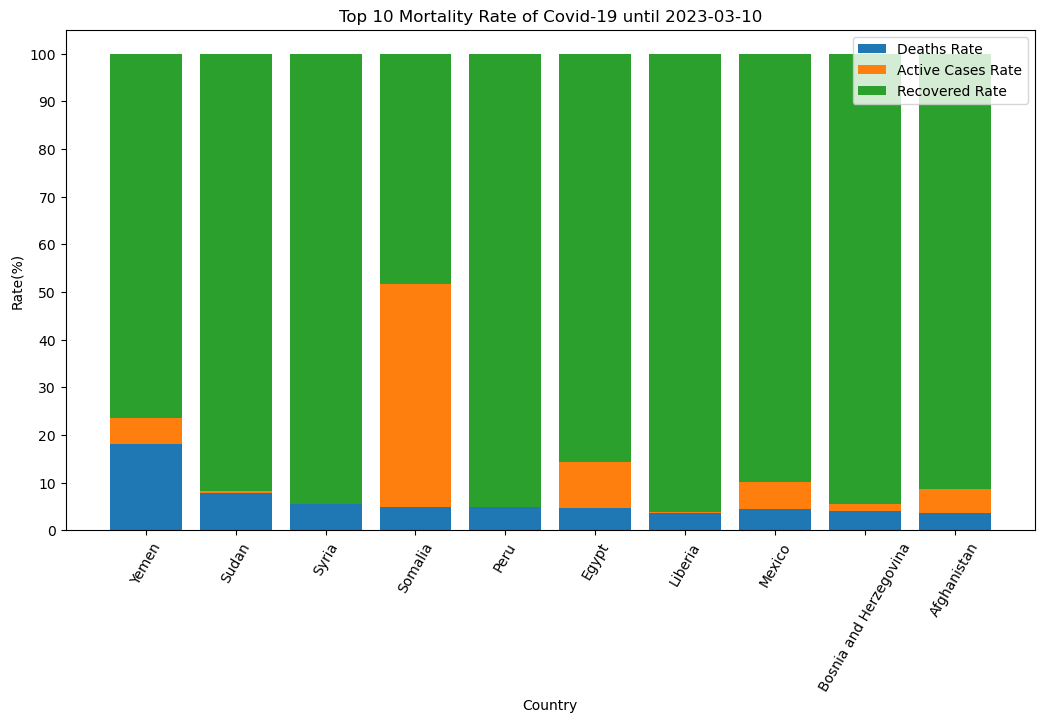

In [5]:
# Data to plot
labels = top_10['Country']
data1 = top_10['TotalDeaths'] / top_10['TotalCases'] * 100
data2 = top_10['ActiveCases'] / top_10['TotalCases'] * 100
data3 = top_10['TotalRecovered'] / top_10['TotalCases']* 100

# Create plot
x = np.arange(10)
fig, ax = plt.subplots()
ax.bar(x, data1, label='Deaths Rate')
ax.bar(x, data2, bottom=data1, label='Active Cases Rate')
ax.bar(x, data3, bottom=data1+data2, label='Recovered Rate')

# Set labels
ax.set_ylabel('Rate(%)')
ax.set_xlabel('Country')
ax.set_title('Top 10 Mortality Rate of Covid-19 until 2023-03-10')

# figure size
fig.set_size_inches(12.5, 6.5)

# rotate xtick labels
plt.xticks(rotation=60)

# set ticks for x, y
ax.set_yticks(np.arange(0, 101, 10))
ax.set_xticks(x)
ax.set_xticklabels(last_day_df['Country'].head(10))
ax.legend()

&#9889; <font color="yellow">**Comment on the results.**</font>
- The mortality rate of Yemen is highest among all countries, accounting for approximate 20% of the total cases and the only one country with mortality rate above 10%. That is the result of a combination of factors such as a weak health care system, displacement and internal conflicts, as well as the possibility of inaccurate data sources in Yemen.
- The mortality rate of other countries in top 10 have under 10% of the total cases. 
- As we can see, Somalia is not only in top 10 countries with the highest mortality rate, but also the number of active cases is also high, with nearly 50% of the total cases. So we cannot clearly conclude the situation in Somalia, but we can see that the situation is not good.